#Introduction

At the April 2016 PyLadies meetup, we held a hummus tasting. There were 7 varieties of hummus, labeled "A" through "G". Each participant was instructed to try all the varieties and report their favorite and least favorite. Participants also reported their hummus experience level on the scale: "first time", "tried before", "infrequent eater", "regular eater".

This Jupyter notebook lays out an analysis of the hummus tasting data in Python. The key questions to investigate are:
* Is there a crowd favorite hummus?
* Is there a crowd least favorite?
* Do hummus preferences vary by experience level?

In [2]:
# Import packages
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Data Preparation

In this section, we import and examine the raw data. Then, we clean and transform it to prepare for analysis.

In [3]:
# Read in data
# Note: assumes data file is in same directory as notebook
raw_df = pd.read_csv('hummus.csv')

In [4]:
# Print raw data
raw_df

,least_favorite,favorite,hummus_experience_level,notes
0,G,F,infrequent eater,"only tried E, F, G"
1,G,C,regular eater,NaN
2,G,B,infrequent eater,NaN
3,E,B,infrequent eater,NaN
4,G,F,infrequent eater,NaN
5,F,A,regular eater,NaN
6,G,A,regular eater,NaN
7,E,C,infrequent eater,NaN
8,E,B,infrequent eater,NaN
9,B,G,regular eater,NaN


In [5]:
# Remove two data points with notes
filtered_df = raw_df[raw_df.notes.astype(str) == 'nan'].reset_index(drop=True)

In [6]:
# Print distribution of experience levels
filtered_df.hummus_experience_level.value_counts()

regular eater       10
infrequent eater     9
tried before         1
Name: hummus_experience_level, dtype: int64

In [7]:
# Combine "tried before" and "infrequent eater" groups
transformed_df = filtered_df.copy()
transformed_df['regular_flag'] = transformed_df.hummus_experience_level == 'regular eater'

In [8]:
# Make hummus varieties categorical
varieties = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
transformed_df['favorite'] = pd.Categorical(transformed_df['favorite'], categories = varieties)
transformed_df['least_favorite'] = pd.Categorical(transformed_df['least_favorite'], categories = varieties)

In [9]:
# Extract columns to keep
df = transformed_df[['favorite', 'least_favorite', 'regular_flag']]

In [10]:
# Print cleaned data
df

,favorite,least_favorite,regular_flag
0,C,G,True
1,B,G,False
2,B,E,False
3,F,G,False
4,A,F,True
5,A,G,True
6,C,E,False
7,B,E,False
8,G,B,True
9,A,D,False


#Exploratory Data Analysis

In this section, we visualize the hummus data using bar plots.

From the plots we can observe:
* Hummus A and F tied for most favorite votes (4 each).
* Hummus G received the most least favorite votes (7), followed by hummus B (5).
* All of hummus B's favorite votes (3) were from the non-regular hummus eaters.
* All of hummus E's least favorite votes (3) were from non-regular hummus eaters.
* All of hummus F's favorite votes (3) were from regular hummus eaters.

In [11]:
# Count favorite and least favorite votes
favorite_cts = df.favorite.value_counts().sort_index()
least_favorite_cts = df.least_favorite.value_counts().sort_index()

In [12]:
# Print vote counts
print favorite_cts
print
print least_favorite_cts

A    4
B    3
C    3
D    0
E    3
F    4
G    3
Name: favorite, dtype: int64

A    0
B    5
C    0
D    2
E    3
F    3
G    7
Name: least_favorite, dtype: int64


In [13]:
# Split out counts for regular and non-regular hummus eaters
reg_favorite_cts = df[df.regular_flag].favorite.value_counts().sort_index()
reg_least_favorite_cts = df[df.regular_flag].least_favorite.value_counts().sort_index()
nonreg_favorite_cts = df[np.logical_not(df.regular_flag)].favorite.value_counts().sort_index()
nonreg_least_favorite_cts = df[np.logical_not(df.regular_flag)].least_favorite.value_counts().sort_index()

In [14]:
# Function for side-by-side barplot of favorite votes and least favorite votes
def votes_barplot(ax, favorite_cts, least_favorite_cts, ymax=None):
    left_edge = np.arange(len(favorite_cts))
    width = 0.35
    
    favorite_cts = list(favorite_cts)
    least_favorite_cts = list(least_favorite_cts)
    
    fbars = ax.bar(left_edge, favorite_cts, width, color='blue')
    lbars = ax.bar(left_edge + width, least_favorite_cts, width, color='orange')
    
    ax.set_ylabel('Votes')
    if not ymax:
        ymax = max(favorite_cts + least_favorite_cts) + 1
    ax.set_ylim([0, ymax])
    
    ax.set_xlabel('Hummus Variety')
    ax.set_xlim([min(left_edge) - width, max(left_edge) + 3*width])
    ax.set_xticks(left_edge + width)
    ax.set_xticklabels(varieties)
    
    ax.legend([fbars, lbars], ["Favorite", "Least Favorite"], loc=2)

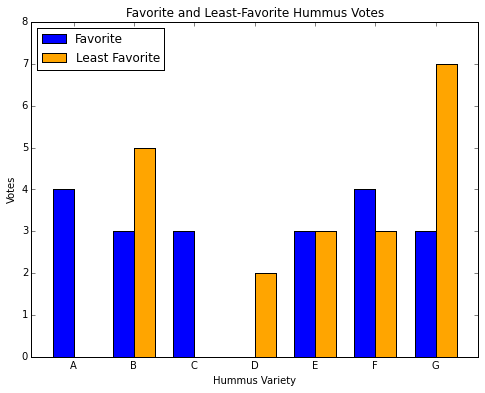

In [15]:
# Side-by-side barplot of votes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_title('Favorite and Least-Favorite Hummus Votes')
votes_barplot(ax, favorite_cts, least_favorite_cts)
plt.show()

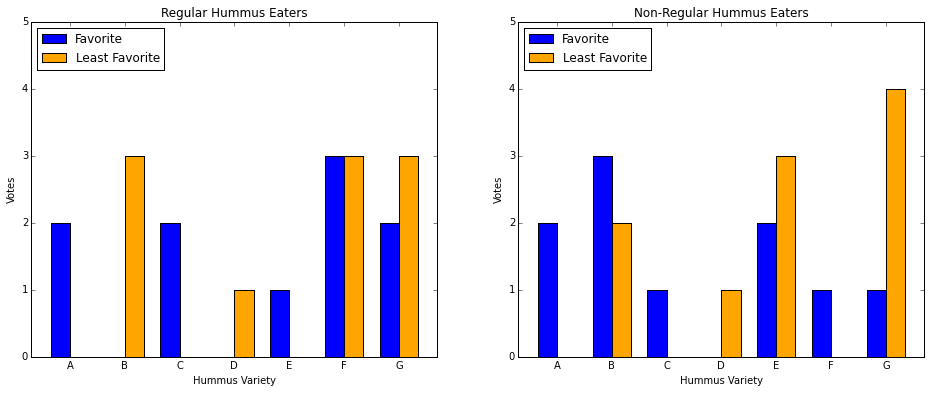

In [16]:
# Side-by-side barplot of votes, split out by hummus experience level
ymax = max([reg_favorite_cts.max(), reg_least_favorite_cts.max(),
            nonreg_favorite_cts.max(), nonreg_least_favorite_cts.max()]) + 1

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax1.set_title('Regular Hummus Eaters')
votes_barplot(ax1, reg_favorite_cts, reg_least_favorite_cts, ymax)
ax2 = fig.add_subplot(122)
ax2.set_title('Non-Regular Hummus Eaters')
votes_barplot(ax2, nonreg_favorite_cts, nonreg_least_favorite_cts, ymax)
plt.show()

#Favorite/Least Favorite - Monte Carlo Simulation

Now that we have a clean data set and have explored it visually, we can finally investigate the analysis questions. Let's start with the first two:
* Is there a crowd favorite hummus?
* Is there a crowd least favorite?

To test these statistically, we need to translate them into questions about specific quantities in the data set. The crowd favorite hummus is the variety that received the highest number of favorite votes. But, is this maximum large enough to indicate a true crowd favorite, or could it have arisen by chance under random voting?

Specifically, suppose each participant's favorite was equally like to be any of the 7 hummus varieties and there was no relationship between their vote and any of the others. (In technical terms, suppose participants' favorites were independent, identically distributed discrete uniform random variables.) If the maximum number of favorite votes is unusually high under these assumptions, there is evidence of a crowd favorite.

To test this, use Monte Carlo simulation. Simulate data sets by drawing each vote from {A, B, C, D, E, F, G}. For each simulated data set, compute the maximum number of favorite votes. If the original maximum number of favorite votes is higher than the vast majority of simulated values, we can conclude that there is a crowd favorite.

The same logic and technique can be applied to test for a crowd least favorite.

In [17]:
# Calculate observed max counts
favorite_max_votes = np.max(favorite_cts)
least_favorite_max_votes = np.max(least_favorite_cts)
print 'Actual Max Votes'
print 'favorite: ' + str(favorite_max_votes)
print 'least favorite: ' + str(least_favorite_max_votes)

Actual Max Votes
favorite: 4
least favorite: 7


In [18]:
# Run Monte Carlo simulations
def monte_carlo_max_votes(varieties, n):
    sample = np.random.choice(varieties, size=n, replace=True)  # sample n iid votes
    sample = pd.Series(sample)
    max_votes = np.max(sample.value_counts())
    return max_votes

n = df.shape[0]
N = 10000
sims = pd.Series([monte_carlo_max_votes(varieties, n) for _ in range(N)])

/Users/jmichelman/miniconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


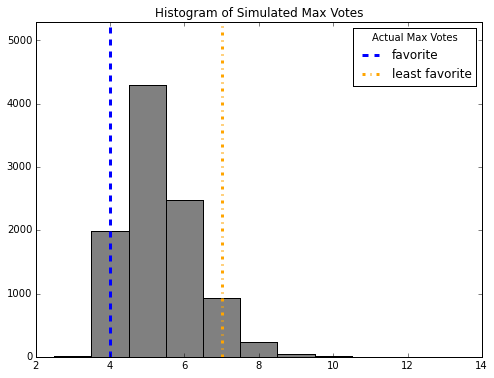

In [19]:
# Plot histogram of simulated values
sims_table = sims.value_counts().sort_index()
left_edge = np.array(sims_table.index) - 0.5
heights = sims_table
ymax = heights.max() + N/10

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_title('Histogram of Simulated Max Votes')
ax.set_ylim([0, ymax])

ax.bar(left_edge, heights, width=1, color='gray')
ax.vlines(favorite_max_votes, 0, ymax, linewidth=3.0,
          colors='blue', linestyles='dashed', label='favorite')
ax.vlines(least_favorite_max_votes, 0, ymax, linewidth=3.0,
          colors='orange', linestyles='dashdot', label='least favorite')
ax.legend(title='Actual Max Votes')
plt.show()

In [20]:
# Calculate p-values
print np.mean(sims >= favorite_max_votes)
print np.mean(sims >= least_favorite_max_votes)

0.998
0.122


###Favorite/Least Favorite Conclusions

Crowd Favorite: Hummus varieties A and F tied for highest number of favorite votes at 4 votes each. Based on the Monte Carlo simulation, there is no evidence of a single crowd favorite hummus variety (p=0.99).

Crowd Least Favorite: Hummus variety G had the highest number of least favorite votes at 7 votes. Based on the Monte Carlo simulation, there is mild evidence of a crowd least favorite (p=0.12). Note that this is not statistically significant, but with sample size of only 20, a small p-value is difficult to achieve.

#Hummus Experience Levels - Permutation Test

Finally, let's investigate the third analysis question:
* Do hummus preferences vary by experience level?

Again, we need to translate this into a question about a specific quantity in the data set. One option is to look at the difference in number of favorite votes between the regular and non-regular hummus eaters. Is the maximum absolute difference large enough to be evidence of a difference in preferences, or could it have arisen by chance under random assignment to experience levels?

Specifically, suppose there is no relationship between each participant's experience level and their favorite hummus. (In technical terms, experience level assignment and favorite are independent random variables). If the maximum absolute difference in favorite votes is unusually high under these assumptions, there is evidence of a difference between the groups.

To test this, use approximate permutation testing. Simulate data sets by randomly permuting experience group assignments. For each simulated data set, compute the maximum absolute difference in favorite votes between the two groups. If the original absolute maximum is higher than the vast majority of simulated values, we can conclude that there is a difference in favorites.

The same logic and technique can be applied to test for a difference in least favorites between the two groups.

In [21]:
# Print vote count differences
print reg_favorite_cts - nonreg_favorite_cts
print
print reg_least_favorite_cts - nonreg_least_favorite_cts

A    0
B   -3
C    1
D    0
E   -1
F    2
G    1
Name: favorite, dtype: int64

A    0
B    1
C    0
D    0
E   -3
F    3
G   -1
Name: least_favorite, dtype: int64


In [22]:
# Calculate the observed max absolute difference
favorite_max_abs_diff = max(abs(reg_favorite_cts - nonreg_favorite_cts))
least_favorite_max_abs_diff = max(abs(reg_least_favorite_cts - nonreg_least_favorite_cts))
print 'Actual Max Absolute Difference'
print 'favorite: ' + str(favorite_max_abs_diff)
print 'least favorite: ' + str(least_favorite_max_abs_diff)

Actual Max Absolute Difference
favorite: 3
least favorite: 3


In [ ]:
# Run Monte Carlo simulations
def monte_carlo_max_votes(varieties, n):
    sample = np.random.choice(varieties, size=n, replace=True)  # sample n iid votes
    sample = pd.Series(sample)
    max_votes = np.max(sample.value_counts())
    return max_votes

n = df.shape[0]
N = 10000
sims = pd.Series([monte_carlo_max_votes(varieties, n) for _ in range(N)])

In [28]:
# Run permutation test simulations
def permutation_test_max_abs_diff(votes, flags):
    permuted_flags = np.random.choice(flags, size=len(flags), replace=False)  # randomize groups
    flag1_cts = votes[permuted_flags].value_counts().sort_index()
    flag0_cts = votes[np.logical_not(permuted_flags)].value_counts().sort_index()
    max_abs_diff = max(abs(flag1_cts - flag0_cts))
    return max_abs_diff

flags = df.regular_flag
N = 10000
favorite_sims = pd.Series([permutation_test_max_abs_diff(df.favorite, flags) for _ in range(N)])
least_favorite_sims = pd.Series([permutation_test_max_abs_diff(df.least_favorite, flags) for _ in range(N)])

In [29]:
def perm_test_barplot(ax, sims_table, ymax=None):
    left_edge = np.array(sims_table.index) - 0.5
    width = 1
    
    ax.bar(left_edge, sims_table, width, color='gray')
    
    xmax = max(sims_table.index) + 0.5
    ax.set_xlim([-0.5, xmax])
    
    if not ymax:
        ymax = sims_table.max() + sims_table.sum()/10
    ax.set_ylim([0, ymax])    

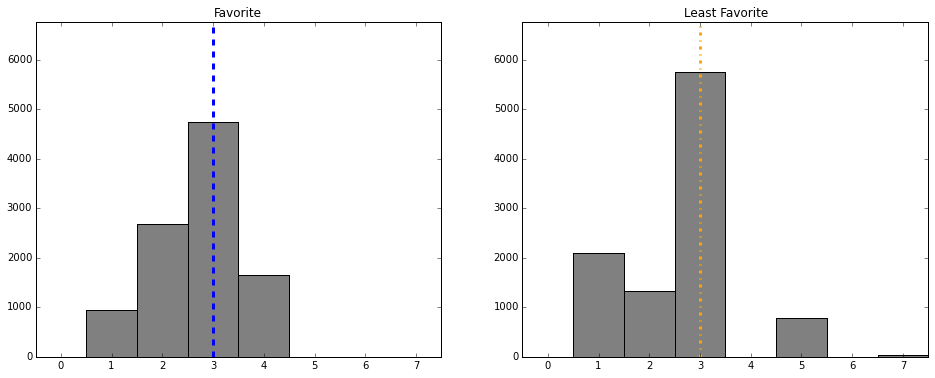

In [30]:
# Plot histograms of simulated values
xmax = max([favorite_sims.max(), least_favorite_sims.max()])
values = np.arange(xmax+1)
left_edge = values - 0.5

favorite_sims_table = pd.Categorical(favorite_sims, categories = values).value_counts().sort_index()
least_favorite_sims_table = pd.Categorical(least_favorite_sims, categories = values).value_counts().sort_index()
ymax = max([favorite_sims_table.max(), least_favorite_sims_table.max()]) + N/10

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax1.set_title('Favorite')
perm_test_barplot(ax1, favorite_sims_table, ymax)
ax1.vlines(favorite_max_abs_diff, 0, ymax, linewidth=3.0,
           colors='blue', linestyles='dashed')
ax2 = fig.add_subplot(122)
ax2.set_title('Least Favorite')
perm_test_barplot(ax2, least_favorite_sims_table, ymax)
ax2.vlines(least_favorite_max_abs_diff, 0, ymax, linewidth=3.0,
           colors='orange', linestyles='dashdot')
plt.show()

In [31]:
# Calculate p-values
print np.mean(favorite_sims >= favorite_max_abs_diff)
print np.mean(least_favorite_sims >= least_favorite_max_abs_diff)

0.6384
0.6573


###Experience Level Conclusions

Favorite: Hummus variety B had the largest difference in favorite votes at -3. Variety B was more popular among non-regular hummus eaters. 

Least Favorite: Hummus varieties E and F tied for largest difference in least favorite votes at -3 and 3, respectively. Variety E was more disliked among non-regular hummus eaters, and variety F was more disliked among regular hummus eaters.

However, based on the permutation tests, these differences are not statistically significant (p=0.64, p=0.66). There is no evidence of a difference in either favorite or least favorite preferences between hummus experience levels.

##APPENDIX - Hummus Key

For those of you who attended the hummus tasting, you might be wondering which hummus was which. Luckily, the PyLadies organizers recorded the hummus key.

In [26]:
# Read in key
# Note: assumes data file is in same directory as notebook
key_df = pd.read_csv('hummus_key.csv')

In [27]:
# Print key
key_df

,variety,brand
0,A,Sabra
1,B,Penny's Creamy
2,C,Athenos
3,D,Organics
4,E,Open Nature
5,F,Hummusphere
6,G,Homemade


My favorite hummus variety was A, followed by B. My least favorite was G, followed by F. Here is what I recall about them.
* A (Sabra) was mildly tangy.
* B (Penny's Creamy) had a strong lemon flavor.
* F (Hummusphere) was smokey.
* G (homemade) had a prominent olive oil flavor.